# Frequency Domain

In [14]:
import numpy as np
import numpy.fft as fft
import matplotlib.pyplot as plt
import skimage as ski
from skimage import data
import cv2

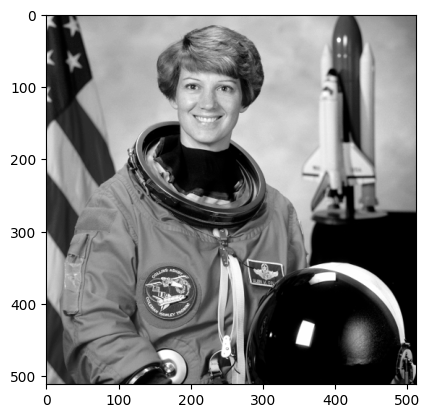

In [4]:
im = data.astronaut()
im = np.dot(im[:,:,:3], [0.2989, 0.5870, 0.1140])
plt.imshow(im, cmap='gray')
plt.show()

## Fourier Fast Transform 2D

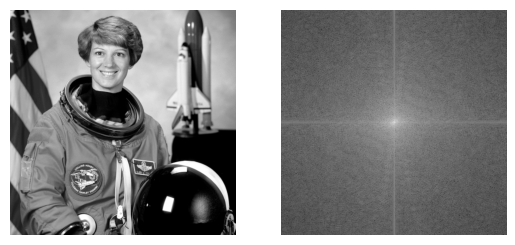

In [21]:
fftim = fft.fftshift(fft.fft2(im))
plt.subplot(121)
plt.imshow(im, cmap='gray')
plt.axis('off')
plt.subplot(122)
plt.imshow(np.log(np.abs(fftim)), cmap='gray')
plt.axis('off')
plt.show()

## Low pass

### Ideal

In [40]:
r, c = im.shape
center = (r // 2, c // 2)
mask = np.zeros(im.shape)
mask = cv2.circle(mask, center, int(r*0.05), (255, 255, 255), -1)

In [99]:
def imshow(ims, r, c):
    plt.subplots(figsize=(12, 12))
    for i in range(r*c):
        plt.subplot(r, c, i + 1)
        plt.imshow(ims[i], cmap='gray')
        plt.axis('off')
    plt.show()

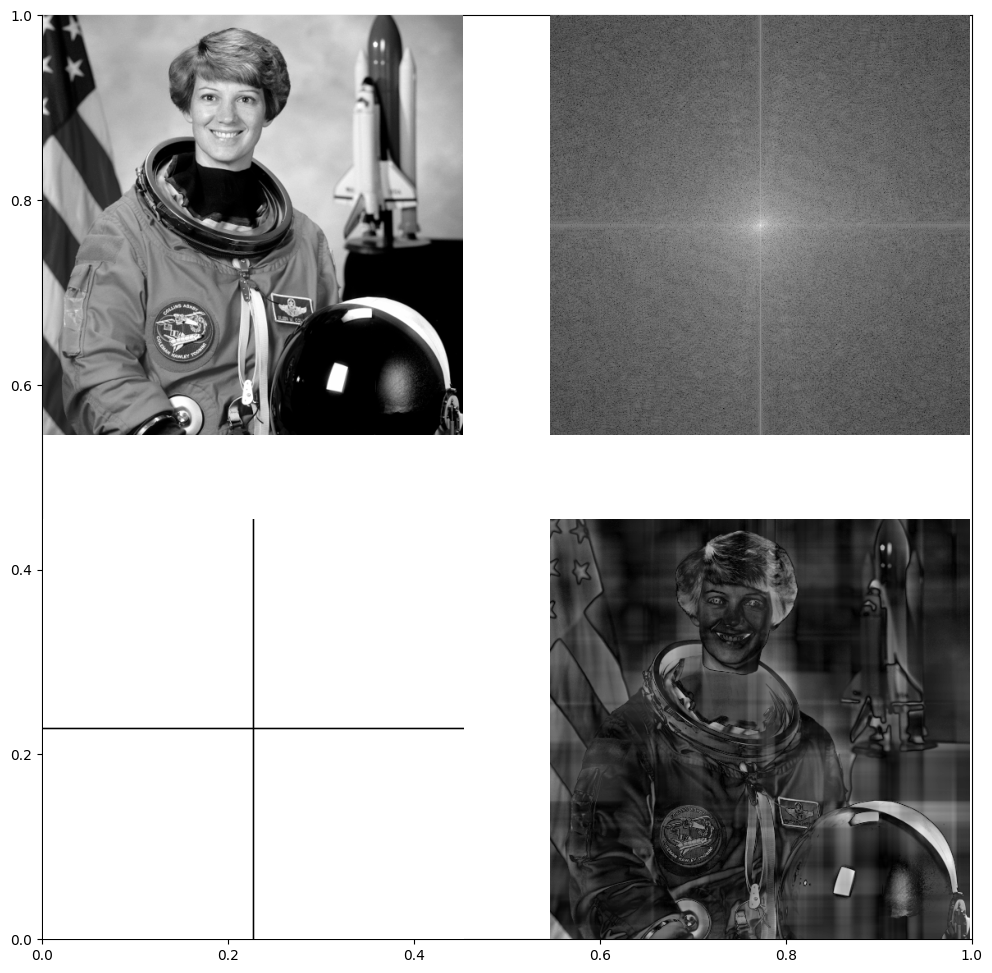

In [100]:
out = mask * fftim
out = abs(fft.ifft2(fft.ifftshift(out)))
imshow([im, np.log(abs(fftim)),
        mask, out], 2, 2)

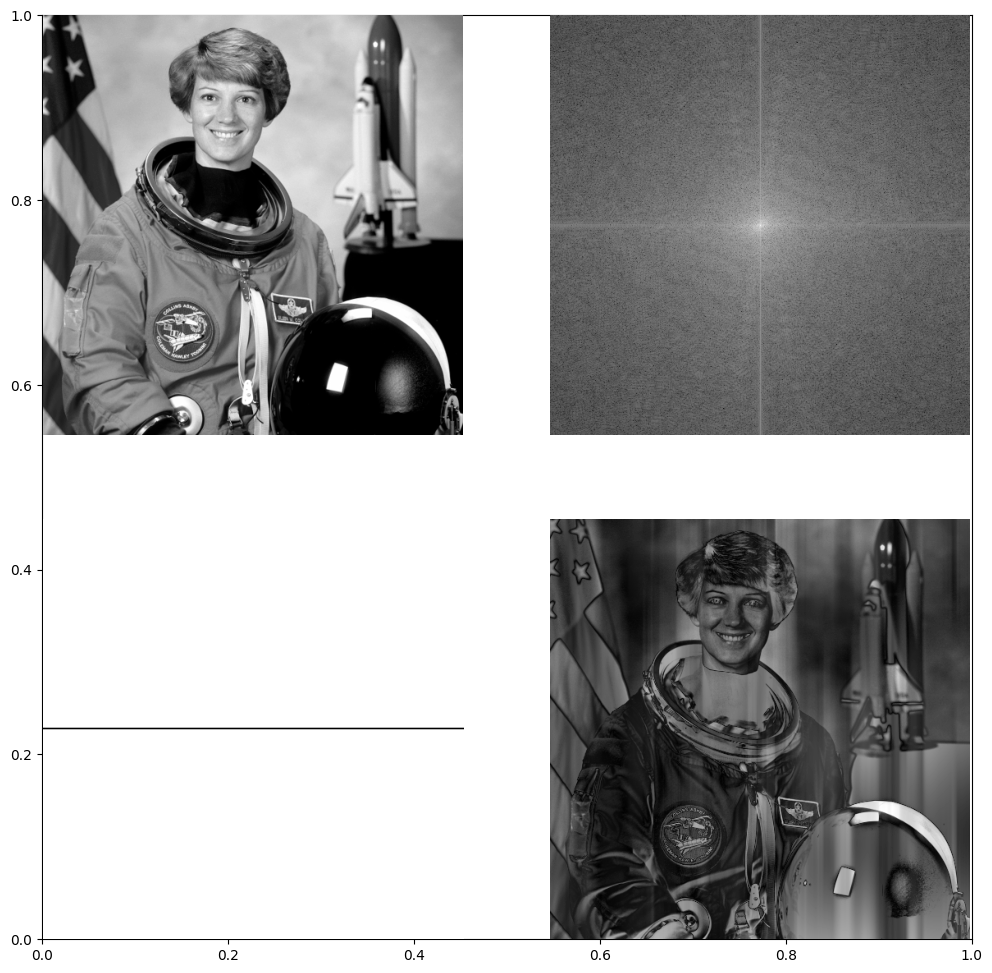

In [101]:
r, c = im.shape
center = (r // 2, c // 2)
mask = np.ones(im.shape)
centerrow, centercol = center
mask[centerrow-1:centerrow+1, :] = 0
out = mask * fftim
out = abs(fft.ifft2(fft.ifftshift(out)))
imshow([im, np.log(abs(fftim)),
        mask, out], 2, 2)

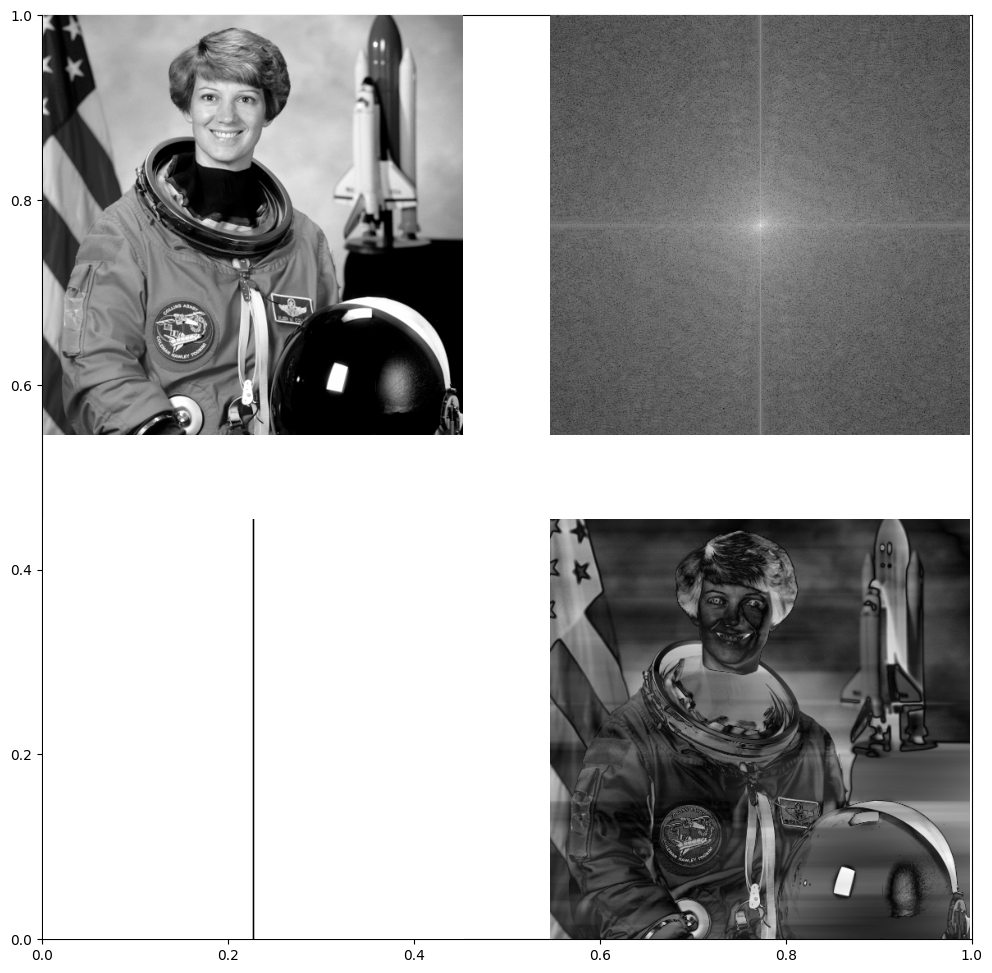

In [102]:
r, c = im.shape
center = (r // 2, c // 2)
mask = np.ones(im.shape)
centerrow, centercol = center
mask[:, centercol-1:centercol+1] = 0
out = mask * fftim
out = abs(fft.ifft2(fft.ifftshift(out)))
imshow([im, np.log(abs(fftim)),
        mask, out], 2, 2)

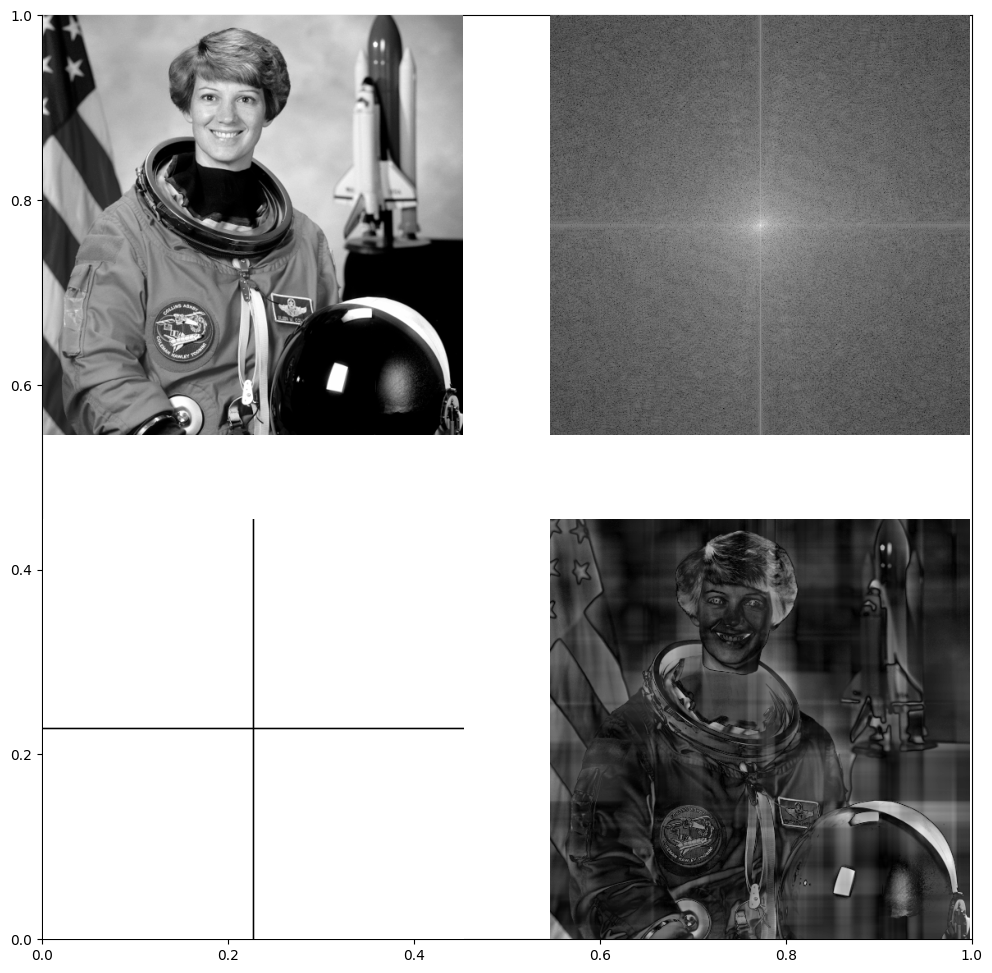

In [103]:
r, c = im.shape
center = (r // 2, c // 2)
mask = np.ones(im.shape)
centerrow, centercol = center
mask[centerrow-1:centerrow+1, :] = 0
mask[:, centercol-1:centercol+1] = 0
out = mask * fftim
out = abs(fft.ifft2(fft.ifftshift(out)))
imshow([im, np.log(abs(fftim)),
        mask, out], 2, 2)

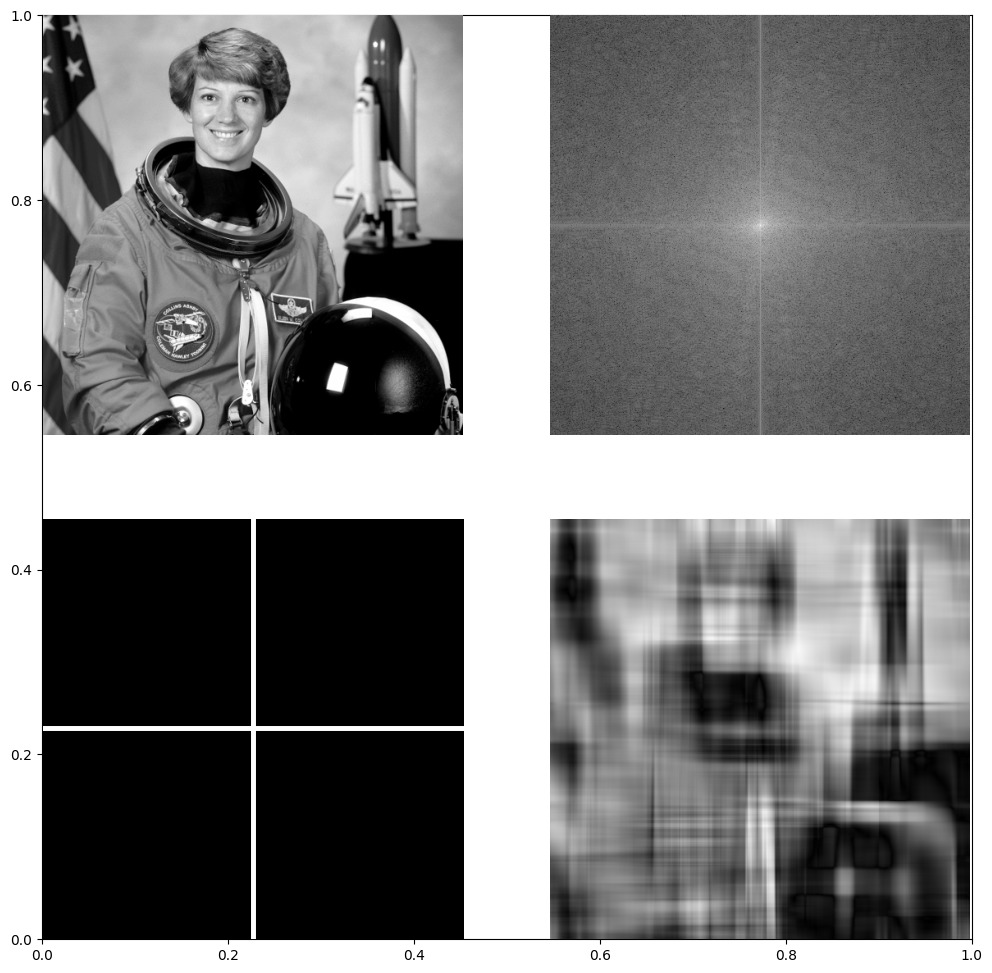

In [105]:
r, c = im.shape
center = (r // 2, c // 2)
mask = np.zeros(im.shape)
centerrow, centercol = center
mask[centerrow-3:centerrow+3, :] = 1
mask[:, centercol-3:centercol+3] = 1
out = mask * fftim
out = abs(fft.ifft2(fft.ifftshift(out)))
imshow([im, np.log(abs(fftim)),
        mask, out], 2, 2)